# Importando as Bibliotecas

In [265]:
#importando as bibliotecas que serão utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from ipywidgets import widgets,  HBox, VBox
from IPython.display import display

In [266]:
#ignorando as mensangens de alertas na saída para facilitar a leitura
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

# Entendimento e Limpeza dos Dados

In [267]:
#Visualização dos dados
df = pd.read_csv('houses_to_rent_v2.csv')
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [268]:
#Tamanho do Dataset
df.shape

(10692, 13)

In [269]:
#Verificando as informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [270]:
#Verificando valores nulos
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [271]:
#Quantidade de valores únicos
df.nunique()

city                      5
area                    517
rooms                    11
bathroom                 10
parking spaces           11
floor                    35
animal                    2
furniture                 2
hoa (R$)               1679
rent amount (R$)       1195
property tax (R$)      1243
fire insurance (R$)     216
total (R$)             5751
dtype: int64

In [272]:
#Renomeando as colunas para facilitar o controle dos dados
nome_colunas = {'hoa (R$)': 'hoa', 'rent amount (R$)': 'rent', 'property tax (R$)': 'property tax', 'fire insurance (R$)': 'fire insurance', 'total (R$)': 'total'}
df = df.rename(columns=nome_colunas)
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [273]:
#Transformando a coluna de imóveis mobilhados em valores booleanos
df['furniture'] = df['furniture'].map({'furnished':1, 'not furnished': 0})

In [274]:
#Transformando a coluna de imóveis que aceitam animais em valores booleanos
df['animal'] = df['animal'].map({'acept':1, 'not acept': 0})

In [275]:
#No dataset quando a residência era uma casa havia o sinal '-' na coluna floor o que estava atrapalhando a leitura
#Tomei a liberdade de trocar esses valores para 0, pois após realizar uma análise percebi que esses imóveis podem se tratar de casas
df['floor'] = df['floor'].replace('-', 0, regex= True)

In [276]:
#Transformando a coluna de cidade em valores para ser possível a leitura da regressão linear
lb = preprocessing.LabelEncoder()
df['city'] = lb.fit_transform(df['city'])
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent,property tax,fire insurance,total
0,4,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,4,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,2,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,2,51,2,1,0,2,1,0,270,1112,22,17,1421
4,4,25,1,1,0,1,0,0,0,800,25,11,836
5,4,376,3,3,7,0,1,0,0,8000,834,121,8955
6,3,72,2,1,0,7,1,0,740,1900,85,25,2750
7,4,213,4,4,4,4,1,0,2254,3223,1735,41,7253
8,4,152,2,2,1,3,1,1,1000,15000,250,191,16440
9,3,35,1,1,0,2,1,1,590,2300,35,30,2955


In [277]:
#0 é igual a Belo Horizonte
#1 é igual a Campinas
#2 é igual a Porto Alegre
#3 é igual a Rio de Janeiro
#4 é igual a São Paulo

# Análise Exploratória

Text(0.5, 1.0, 'Valor Total do Aluguel')

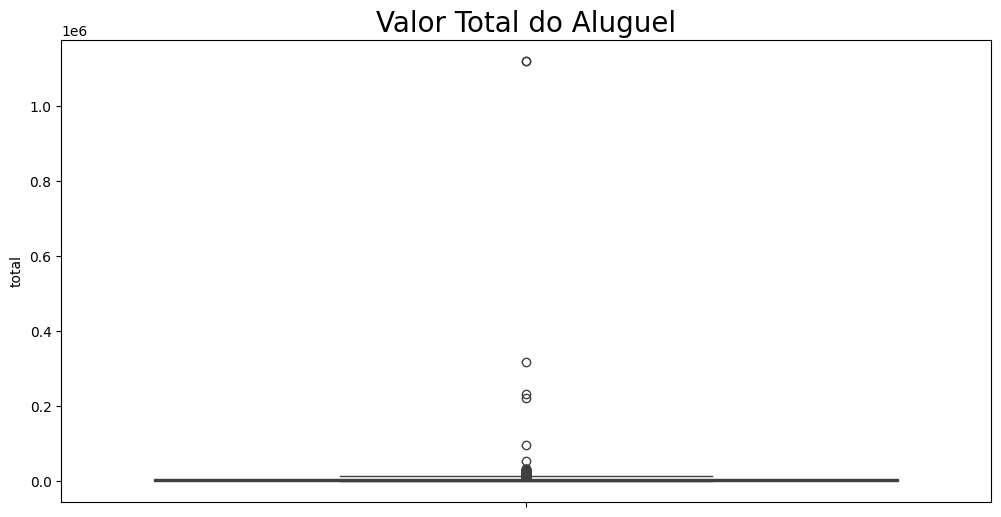

In [278]:
#Verificando outliers utilizando o boxplot
ax = sns.boxplot(df['total'])
ax.figure.set_size_inches(12,6)
ax.set_title('Valor Total do Aluguel', fontsize = 20)

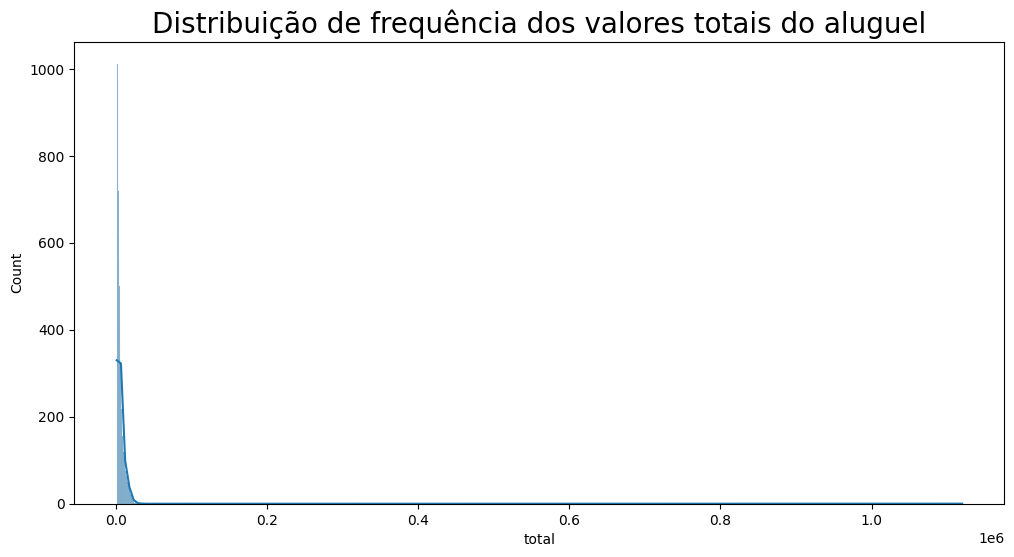

In [279]:
#Histograma da distribuição dos valores do aluguel
ax = sns.histplot(df['total'], kde=True)
ax.set_title('Distribuição de frequência dos valores totais do aluguel', fontsize = 20)
ax.figure.set_size_inches(12,6)

Utilizando a fórmula do boxplot para poder remover os outliers

In [280]:
#Atribuindo os valores do aluguel a uma Series
total = df['total']

In [281]:
#Fórmula do Boxplot para tratar os outliers
Q1 = total.quantile(.25)
Q3 = total.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [282]:
#Atribuindo a um novo Dataframe somente os dados sem outliers
selecao = (total >=limite_inferior) & (total <= limite_superior)
df_new = df[selecao]
df_new

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent,property tax,fire insurance,total
0,4,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,4,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,2,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,2,51,2,1,0,2,1,0,270,1112,22,17,1421
4,4,25,1,1,0,1,0,0,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,4,83,3,2,2,11,1,0,888,7521,221,96,8726
10686,4,150,3,3,2,8,0,1,0,13500,0,172,13670
10687,2,63,2,1,1,5,0,1,402,1478,24,22,1926
10689,3,70,3,3,0,8,0,1,980,6000,332,78,7390


In [283]:
#Verificando o tamanho do Dataframa atualizado
df_new.shape

(9986, 13)

Text(0.5, 1.0, 'Valor Total do Aluguel')

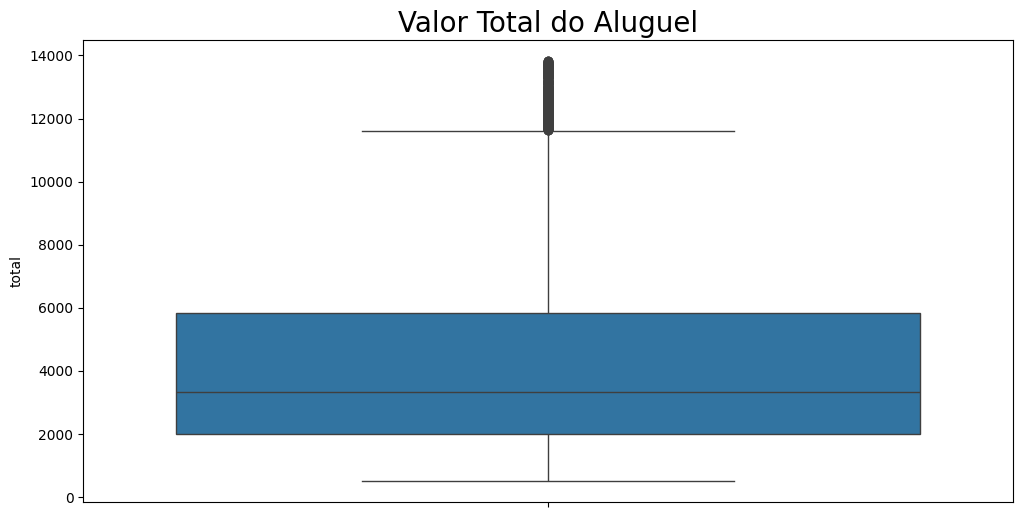

In [284]:
#Verificando novamente o boxplot sem os outliers, melhorando a leitura
ax = sns.boxplot(df_new['total'])
ax.figure.set_size_inches(12,6)
ax.set_title('Valor Total do Aluguel', fontsize = 20)

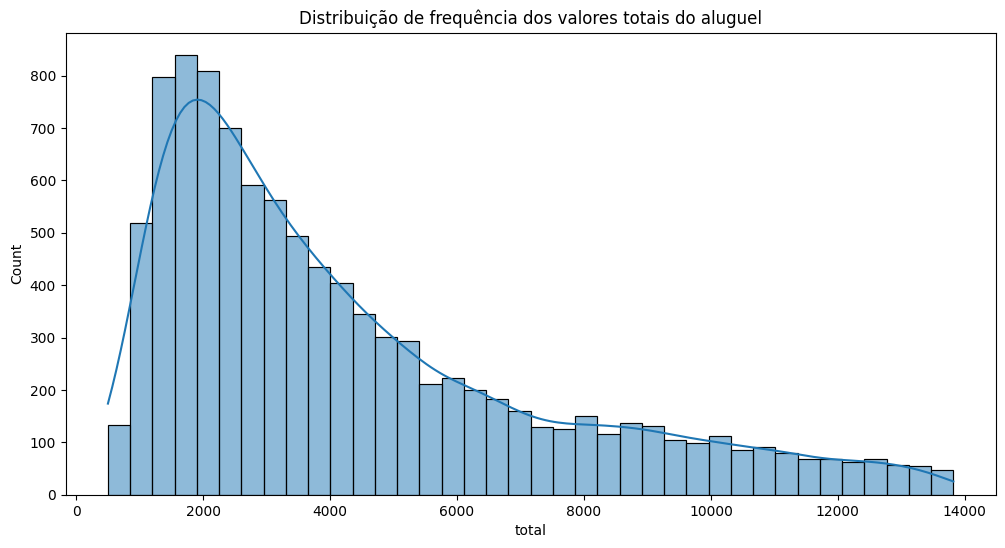

In [285]:
#Distribuição de frequência do Dataframe sem outliers
ax = sns.histplot(df_new['total'], kde=True)
ax.set_title('Distribuição de frequência dos valores totais do aluguel')
ax.figure.set_size_inches(12,6)

Verificando a matriz de correlação utilizando o heatmap

<Axes: >

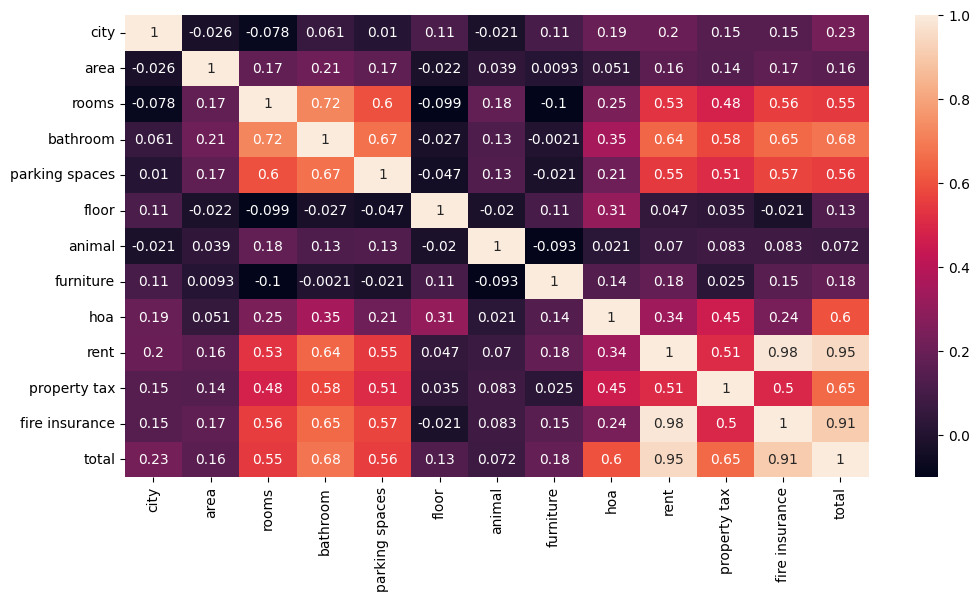

In [286]:
#Verificando a correlação das variáveis
plt.figure(figsize=(12,6))
sns.heatmap(df_new.corr(), annot=True)

# Definição do modelo

Como o total do aluguel é soma do aluguel, condominio, IPTU e Seguro de Incêndio, eu não selecionei essas variáveis para a definição do modelo.

In [287]:
#Definindo as variáveis dependetes (y) e variáveis explicativas (X)
X = df_new.drop(['total','rent', 'hoa', 'property tax', 'fire insurance'],axis=1)
y = df_new['total']

print(X, y)

       city  area  rooms  bathroom  parking spaces floor  animal  furniture
0         4    70      2         1               1     7       1          1
1         4   320      4         4               0    20       1          0
2         2    80      1         1               1     6       1          0
3         2    51      2         1               0     2       1          0
4         4    25      1         1               0     1       0          0
...     ...   ...    ...       ...             ...   ...     ...        ...
10685     4    83      3         2               2    11       1          0
10686     4   150      3         3               2     8       0          1
10687     2    63      2         1               1     5       0          1
10689     3    70      3         3               0     8       0          1
10691     4    80      2         1               0     0       1          0

[9986 rows x 8 columns] 0         5618
1         7973
2         3841
3         1421
4  

In [288]:
#Criando o dataset de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [289]:
#Instanciando o modelo de regressão linear e já realizando o fit com os dados de treino
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [290]:
#Coeficiente de determinação do modelo de treino
print('R²: {}'.format(modelo.score(X_train, y_train).round(2)))

R²: 0.58


In [291]:
#Coeficiente de determinação do modelo de teste
y_pred = modelo.predict(X_test)
print('R²: {}'.format(r2_score(y_test, y_pred).round(2)))

R²: 0.57


In [292]:
#0 é igual a Belo Horizonte
#1 é igual a Campinas
#2 é igual a Porto Alegre
#3 é igual a Rio de Janeiro
#4 é igual a São Paulo

In [293]:
#Criação de um simulador simples
city = 4
area = 200
rooms = 3
bathroom = 3
parking_spaces = 2
floor = 0
animal = 1
furniture = 0

entrada = [[city, area, rooms, bathroom, parking_spaces, floor, animal, furniture]]

print('O valor total do aluguel previsto é R$ {}'.format(modelo.predict(entrada)[0].round(2)))

O valor total do aluguel previsto é R$ 5578.06


In [296]:
#Criação de um simulador interativo

#Criando controles de formulários
cidade = widgets.Text(description= 'Cidade')
area = widgets.Text(description= 'Área')
quartos = widgets.Text(description= 'Quartos')
banheiros = widgets.Text(description= 'Banheiros')
andar = widgets.Text(description= 'Andar')
vagas = widgets.Text(description= 'Vagas Estacionamento')
animais = widgets.Text(description= 'Animais')
mobilhado = widgets.Text(description= 'Mobilhado')

botao = widgets.Button(description= 'Simular')

#Legenda para as cidades

titulo = widgets.Label("Cidades: ")
bh = widgets.Label("0: Belo Horizonte")
campinas = widgets.Label("1: Campinas")
porto_alegre = widgets.Label("2: Porto Alegre")
rj = widgets.Label("3: Rio de Janeiro")
sp = widgets.Label("4: São Paulo")

#Posicionando os controles

left = VBox([cidade, area, quartos, banheiros])
right = VBox([andar, vagas, animais, mobilhado])
legendas = VBox([titulo, bh, campinas, porto_alegre, rj, sp])
inputs = HBox([left, right, legendas])

#Função da simulação, transformando os valores de entrada em floats
#Caso algum valor não seja preenchido será considerado 0

def simulador(sender):
    entrada = [[
        float(cidade.value if cidade.value else 0),
        float(area.value if area.value else 0),
        float(quartos.value if area.value else 0),
        float(banheiros.value if area.value else 0),
        float(andar.value if area.value else 0),
        float(vagas.value if area.value else 0),
        float(animais.value if area.value else 0),
        float(mobilhado.value if area.value else 0)
    ]]
    print('O valor total do aluguel previsto é R$ {}'.format(modelo.predict(entrada)[0].round(2)))


#Atribuindo a função do botão para chamar o simulador
botao.on_click(simulador)

display(inputs,botao)

Button(description='Simular', style=ButtonStyle())

O valor total do aluguel previsto é R$ 4616.46
